In [1]:
import pandas as pd
import numpy as np

from scipy.stats import shapiro
from scipy.stats import kstest
from scipy.stats import anderson
from scipy.stats import normaltest

import os

full_feature_data = pd.DataFrame()
full_ema_data = pd.DataFrame()
full_bfi_data = pd.DataFrame()

for i in range(2, 5):
    curr_folder = './data/globem/INS-W_'+str(i)
    bluetooth_df = pd.read_csv(curr_folder+'/FeatureData/Bluetooth.csv')[['pid', 'date', \
                                    'f_blue:phone_bluetooth_doryab_countscansmostfrequentdevicewithinsegmentsall:allday', \
                                    'f_blue:phone_bluetooth_doryab_uniquedevicesall:evening']]
    bluetooth_df_len = len(bluetooth_df)
    for col in bluetooth_df.columns:
        nan = bluetooth_df[col].isna().sum()
        print(col + ' NaN: ' + str(nan/bluetooth_df_len))

    print('---')

    call_df = pd.read_csv(curr_folder+'/FeatureData/call.csv')[['pid', 'date', \
                                    'f_call:phone_calls_rapids_missed_count:allday', \
                                    'f_call:phone_calls_rapids_outgoing_countmostfrequentcontact:allday', \
                                    'f_call:phone_calls_rapids_incoming_countmostfrequentcontact:allday']]
    call_df_len = len(call_df)
    for col in call_df.columns:
        nan = call_df[col].isna().sum()
        print(col + ' NaN: ' + str(nan/call_df_len))
        
    print('---')

    location_df = pd.read_csv(curr_folder+'/FeatureData/location.csv')[['pid', 'date', \
                                 'f_loc:phone_locations_barnett_hometime:allday', \
                                 'f_loc:phone_locations_barnett_disttravelled:allday', \
                                 'f_loc:phone_locations_barnett_siglocsvisited:allday', \
                                 'f_loc:phone_locations_barnett_wkenddayrtn:allday']]
    location_df_len = len(location_df)
    for col in location_df.columns:
        nan = location_df[col].isna().sum()
        print(col + ' NaN: ' + str(nan/location_df_len))
        
    print('---')   

    screen_df = pd.read_csv(curr_folder+'/FeatureData/screen.csv')[['pid', 'date', \
                                    'f_screen:phone_screen_rapids_sumdurationunlock:morning', \
                                    'f_screen:phone_screen_rapids_countepisodeunlock:evening']]
    screen_df_len = len(screen_df)
    for col in screen_df.columns:
        nan = screen_df[col].isna().sum()
        print(col + ' NaN: ' + str(nan/screen_df_len))
    
    print('---')

    sleep_df = pd.read_csv(curr_folder+'/FeatureData/sleep.csv')[['pid', 'date', 'f_slp:fitbit_sleep_summary_rapids_sumdurationasleepmain:allday', 'f_slp:fitbit_sleep_intraday_rapids_maxdurationasleepunifiedmain:evening', 'f_slp:fitbit_sleep_intraday_rapids_ratiodurationawakeunifiedwithinmain:morning']]
    sleep_df_len = len(sleep_df)
    for col in sleep_df.columns:
        nan = sleep_df[col].isna().sum()
        print(col + ' NaN: ' + str(nan/sleep_df_len))
    
    print('---')
    
    steps_df = pd.read_csv(curr_folder+'/FeatureData/steps.csv')[['pid', 'date', \
                                        'f_steps:fitbit_steps_intraday_rapids_sumsteps:allday', \
                                        'f_steps:fitbit_steps_intraday_rapids_countepisodesedentarybout:allday', \
                                        'f_steps:fitbit_steps_intraday_rapids_sumdurationsedentarybout:allday', \
                                        'f_steps:fitbit_steps_intraday_rapids_maxdurationsedentarybout:allday', \
                                        'f_steps:fitbit_steps_intraday_rapids_countepisodeactivebout:allday', \
                                        'f_steps:fitbit_steps_intraday_rapids_sumdurationactivebout:allday', \
                                        'f_steps:fitbit_steps_intraday_rapids_maxdurationactivebout:allday']]
    steps_df_len = len(steps_df)
    for col in steps_df.columns:
        nan = steps_df[col].isna().sum()
        print(col + ' NaN: ' + str(nan/steps_df_len))
    
    print('---')
    
    dfs = [bluetooth_df, call_df, location_df, screen_df, sleep_df, steps_df]
    merged_df = dfs[0]
    for df in dfs[1:]:
        merged_df = merged_df.merge(df, on=['pid', 'date'], how='inner')
    full_feature_data = pd.concat([full_feature_data, merged_df], ignore_index=True)
    
    ema_df = pd.read_csv(curr_folder+'/SurveyData/ema.csv')
    full_ema_data = pd.concat([full_ema_data, ema_df], ignore_index=True)
    
    bfi_df = pd.read_csv(curr_folder+'/SurveyData/pre.csv')[['pid', 'date', \
                                    'BFI10_extroversion_PRE', \
                                    'BFI10_agreeableness_PRE', \
                                    'BFI10_conscientiousness_PRE', \
                                    'BFI10_neuroticism_PRE', \
                                    'BFI10_openness_PRE']]
    full_bfi_data = pd.concat([full_bfi_data, bfi_df], ignore_index=True)
# print(full_feature_data.head)
print(len(full_feature_data))
full_feature_data.to_csv('merged_unfiltered_feature_data.csv')
full_ema_data.to_csv('merged_unfiltered_ema_data.csv')
full_bfi_data.to_csv('merged_unfiltered_bfi_data.csv')

pid NaN: 0.0
date NaN: 0.0
f_blue:phone_bluetooth_doryab_countscansmostfrequentdevicewithinsegmentsall:allday NaN: 0.23971436678331598
f_blue:phone_bluetooth_doryab_uniquedevicesall:evening NaN: 0.30180648822472333
---


/var/folders/_3/hl68jd8d5_37gmc5q_92ntzw0000gn/T/ipykernel_21024/4113036747.py:27: DtypeWarning: Columns (478,577) have mixed types. Specify dtype option on import or set low_memory=False.
  call_df = pd.read_csv(curr_folder+'/FeatureData/call.csv')[['pid', 'date', \


pid NaN: 0.0
date NaN: 0.0
f_call:phone_calls_rapids_missed_count:allday NaN: 0.5868249314291119
f_call:phone_calls_rapids_outgoing_countmostfrequentcontact:allday NaN: 0.5868249314291119
f_call:phone_calls_rapids_incoming_countmostfrequentcontact:allday NaN: 0.5868249314291119
---
pid NaN: 0.0
date NaN: 0.0
f_loc:phone_locations_barnett_hometime:allday NaN: 0.22756076799394684
f_loc:phone_locations_barnett_disttravelled:allday NaN: 0.22756076799394684
f_loc:phone_locations_barnett_siglocsvisited:allday NaN: 0.22756076799394684
f_loc:phone_locations_barnett_wkenddayrtn:allday NaN: 0.22827012200889057
---


/var/folders/_3/hl68jd8d5_37gmc5q_92ntzw0000gn/T/ipykernel_21024/4113036747.py:50: DtypeWarning: Columns (808,809,810,811,812,813,814,820,834) have mixed types. Specify dtype option on import or set low_memory=False.
  screen_df = pd.read_csv(curr_folder+'/FeatureData/screen.csv')[['pid', 'date', \


pid NaN: 0.0
date NaN: 0.0
f_screen:phone_screen_rapids_sumdurationunlock:morning NaN: 0.27678993663104134
f_screen:phone_screen_rapids_countepisodeunlock:evening NaN: 0.24363945899933795
---
pid NaN: 0.0
date NaN: 0.0
f_slp:fitbit_sleep_summary_rapids_sumdurationasleepmain:allday NaN: 0.47488886787099216
f_slp:fitbit_sleep_intraday_rapids_maxdurationasleepunifiedmain:evening NaN: 0.864276931807434
f_slp:fitbit_sleep_intraday_rapids_ratiodurationawakeunifiedwithinmain:morning NaN: 0.5028374160597749
---
pid NaN: 0.0
date NaN: 0.0
f_steps:fitbit_steps_intraday_rapids_sumsteps:allday NaN: 0.43005769412654876
f_steps:fitbit_steps_intraday_rapids_countepisodesedentarybout:allday NaN: 0.43005769412654876
f_steps:fitbit_steps_intraday_rapids_sumdurationsedentarybout:allday NaN: 0.43005769412654876
f_steps:fitbit_steps_intraday_rapids_maxdurationsedentarybout:allday NaN: 0.43005769412654876
f_steps:fitbit_steps_intraday_rapids_countepisodeactivebout:allday NaN: 0.4301049843942117
f_steps:fitb

/var/folders/_3/hl68jd8d5_37gmc5q_92ntzw0000gn/T/ipykernel_21024/4113036747.py:27: DtypeWarning: Columns (556,557,577) have mixed types. Specify dtype option on import or set low_memory=False.
  call_df = pd.read_csv(curr_folder+'/FeatureData/call.csv')[['pid', 'date', \


pid NaN: 0.0
date NaN: 0.0
f_call:phone_calls_rapids_missed_count:allday NaN: 0.5936503437034937
f_call:phone_calls_rapids_outgoing_countmostfrequentcontact:allday NaN: 0.5936503437034937
f_call:phone_calls_rapids_incoming_countmostfrequentcontact:allday NaN: 0.5936503437034937
---
pid NaN: 0.0
date NaN: 0.0
f_loc:phone_locations_barnett_hometime:allday NaN: 0.5085394373184041
f_loc:phone_locations_barnett_disttravelled:allday NaN: 0.5085394373184041
f_loc:phone_locations_barnett_siglocsvisited:allday NaN: 0.5085394373184041
f_loc:phone_locations_barnett_wkenddayrtn:allday NaN: 0.5088229041173552
---


/var/folders/_3/hl68jd8d5_37gmc5q_92ntzw0000gn/T/ipykernel_21024/4113036747.py:50: DtypeWarning: Columns (52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,1060,1061,1062,1063,1064,1

pid NaN: 0.0
date NaN: 0.0
f_screen:phone_screen_rapids_sumdurationunlock:morning NaN: 0.34724682871518675
f_screen:phone_screen_rapids_countepisodeunlock:evening NaN: 0.3145064134363263
---
pid NaN: 0.0
date NaN: 0.0
f_slp:fitbit_sleep_summary_rapids_sumdurationasleepmain:allday NaN: 0.4238537311317412
f_slp:fitbit_sleep_intraday_rapids_maxdurationasleepunifiedmain:evening NaN: 0.8513925306498477
f_slp:fitbit_sleep_intraday_rapids_ratiodurationawakeunifiedwithinmain:morning NaN: 0.461271348593296
---
pid NaN: 0.0
date NaN: 0.0
f_steps:fitbit_steps_intraday_rapids_sumsteps:allday NaN: 0.36687690454255545
f_steps:fitbit_steps_intraday_rapids_countepisodesedentarybout:allday NaN: 0.3670895046417688
f_steps:fitbit_steps_intraday_rapids_sumdurationsedentarybout:allday NaN: 0.3670895046417688
f_steps:fitbit_steps_intraday_rapids_maxdurationsedentarybout:allday NaN: 0.3670895046417688
f_steps:fitbit_steps_intraday_rapids_countepisodeactivebout:allday NaN: 0.3670895046417688
f_steps:fitbit_st

/var/folders/_3/hl68jd8d5_37gmc5q_92ntzw0000gn/T/ipykernel_21024/4113036747.py:27: DtypeWarning: Columns (565) have mixed types. Specify dtype option on import or set low_memory=False.
  call_df = pd.read_csv(curr_folder+'/FeatureData/call.csv')[['pid', 'date', \


pid NaN: 0.0
date NaN: 0.0
f_call:phone_calls_rapids_missed_count:allday NaN: 0.44695046054269355
f_call:phone_calls_rapids_outgoing_countmostfrequentcontact:allday NaN: 0.44695046054269355
f_call:phone_calls_rapids_incoming_countmostfrequentcontact:allday NaN: 0.44695046054269355
---


/var/folders/_3/hl68jd8d5_37gmc5q_92ntzw0000gn/T/ipykernel_21024/4113036747.py:38: DtypeWarning: Columns (413,414,415,416,417,418,419,420,421,422,423,424,425,426,905,906,907,908,909,910,911,912,913,914,915,916,917,918,1028,1029,1030,1031,1032,1033,1034,1035,1036,1037,1038,1039,1040,1041) have mixed types. Specify dtype option on import or set low_memory=False.
  location_df = pd.read_csv(curr_folder+'/FeatureData/location.csv')[['pid', 'date', \


pid NaN: 0.0
date NaN: 0.0
f_loc:phone_locations_barnett_hometime:allday NaN: 0.331142643764003
f_loc:phone_locations_barnett_disttravelled:allday NaN: 0.331142643764003
f_loc:phone_locations_barnett_siglocsvisited:allday NaN: 0.331142643764003
f_loc:phone_locations_barnett_wkenddayrtn:allday NaN: 0.33119243216330596
---


/var/folders/_3/hl68jd8d5_37gmc5q_92ntzw0000gn/T/ipykernel_21024/4113036747.py:50: DtypeWarning: Columns (71,78,197,204,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,1060,1061,1062,1063,1064,1065,1066,1067,1068,1069,1070,1071,1072,1073,1074,1075,1076,1077,1078,1079,1080,1081,1082,1083,1084,1085,1086,1087) have mixed types. Specify dtype option on import or set low_memory=

pid NaN: 0.0
date NaN: 0.0
f_screen:phone_screen_rapids_sumdurationunlock:morning NaN: 0.258302215583769
f_screen:phone_screen_rapids_countepisodeunlock:evening NaN: 0.23544934030370923
---
pid NaN: 0.0
date NaN: 0.0
f_slp:fitbit_sleep_summary_rapids_sumdurationasleepmain:allday NaN: 0.3739108787652477
f_slp:fitbit_sleep_intraday_rapids_maxdurationasleepunifiedmain:evening NaN: 0.837092357480707
f_slp:fitbit_sleep_intraday_rapids_ratiodurationawakeunifiedwithinmain:morning NaN: 0.4173263629574309
---
pid NaN: 0.0
date NaN: 0.0
f_steps:fitbit_steps_intraday_rapids_sumsteps:allday NaN: 0.3250684590490416
f_steps:fitbit_steps_intraday_rapids_countepisodesedentarybout:allday NaN: 0.3250684590490416
f_steps:fitbit_steps_intraday_rapids_sumdurationsedentarybout:allday NaN: 0.3250684590490416
f_steps:fitbit_steps_intraday_rapids_maxdurationsedentarybout:allday NaN: 0.3250684590490416
f_steps:fitbit_steps_intraday_rapids_countepisodeactivebout:allday NaN: 0.32511824744834456
f_steps:fitbit_ste

array([[<Axes: title={'center': 'f_blue:phone_bluetooth_doryab_countscansmostfrequentdevicewithinsegmentsall:allday'}>,
        <Axes: title={'center': 'f_blue:phone_bluetooth_doryab_uniquedevicesall:evening'}>,
        <Axes: title={'center': 'f_call:phone_calls_rapids_missed_count:allday'}>,
        <Axes: title={'center': 'f_call:phone_calls_rapids_outgoing_countmostfrequentcontact:allday'}>,
        <Axes: title={'center': 'f_call:phone_calls_rapids_incoming_countmostfrequentcontact:allday'}>],
       [<Axes: title={'center': 'f_loc:phone_locations_barnett_hometime:allday'}>,
        <Axes: title={'center': 'f_loc:phone_locations_barnett_disttravelled:allday'}>,
        <Axes: title={'center': 'f_loc:phone_locations_barnett_siglocsvisited:allday'}>,
        <Axes: title={'center': 'f_loc:phone_locations_barnett_wkenddayrtn:allday'}>,
        <Axes: title={'center': 'f_screen:phone_screen_rapids_sumdurationunlock:morning'}>],
       [<Axes: title={'center': 'f_screen:phone_screen_ra

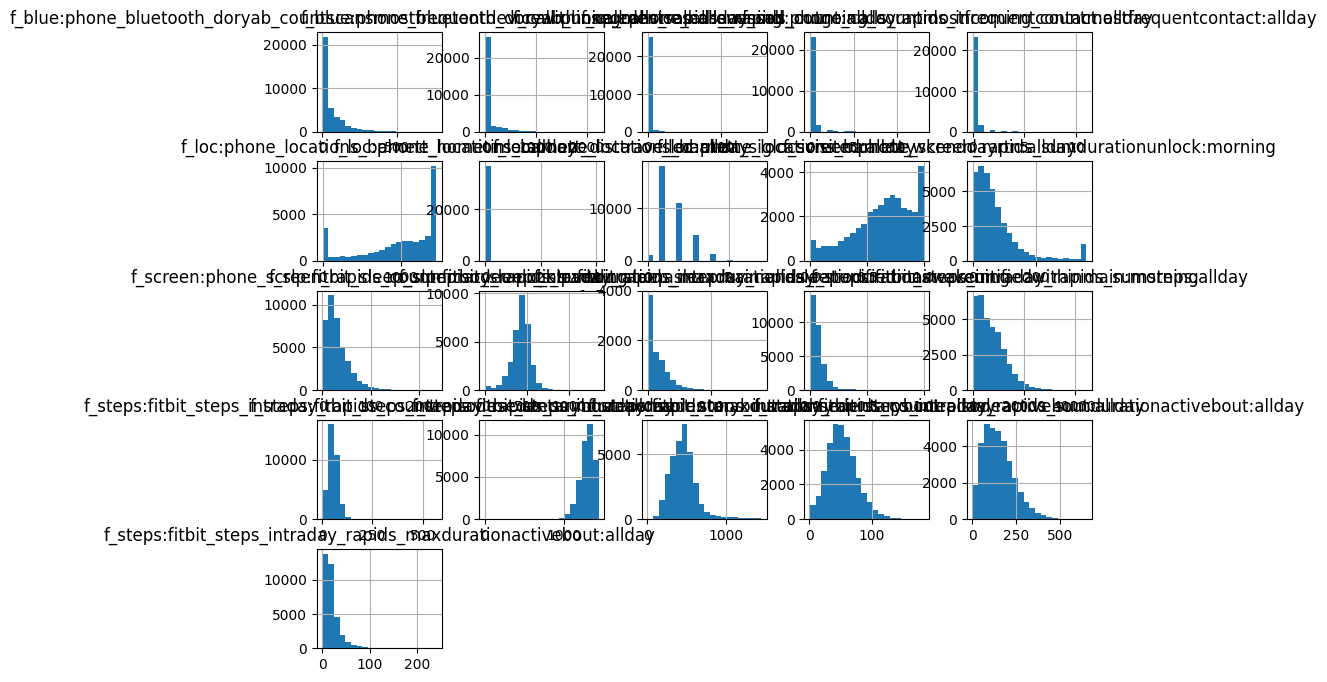

In [2]:
full_feature_data.hist(bins=20, figsize=(10, 8)) 

In [3]:
for col in full_feature_data.columns[2:]:
    non_na_values = full_feature_data[col].dropna()
    stat, p = normaltest(non_na_values)

    if p > 0.05:
        print(f"Column '{col}' is normally distributed (p={p:.4f}). Replacing NaN with mean.")
        full_feature_data[col].fillna(non_na_values.mean(), inplace=True)
    else:
        print(f"Column '{col}' is not normally distributed (p={p:.4f}). Replacing NaN with mode.")
        print(non_na_values.mode()[0])
        full_feature_data[col].fillna(non_na_values.median(), inplace=True)

Column 'f_blue:phone_bluetooth_doryab_countscansmostfrequentdevicewithinsegmentsall:allday' is not normally distributed (p=0.0000). Replacing NaN with mode.
1.0
Column 'f_blue:phone_bluetooth_doryab_uniquedevicesall:evening' is not normally distributed (p=0.0000). Replacing NaN with mode.
1.0
Column 'f_call:phone_calls_rapids_missed_count:allday' is not normally distributed (p=0.0000). Replacing NaN with mode.
0.0
Column 'f_call:phone_calls_rapids_outgoing_countmostfrequentcontact:allday' is not normally distributed (p=0.0000). Replacing NaN with mode.
0.0
Column 'f_call:phone_calls_rapids_incoming_countmostfrequentcontact:allday' is not normally distributed (p=0.0000). Replacing NaN with mode.
0.0
Column 'f_loc:phone_locations_barnett_hometime:allday' is not normally distributed (p=0.0000). Replacing NaN with mode.
1440.0
Column 'f_loc:phone_locations_barnett_disttravelled:allday' is not normally distributed (p=0.0000). Replacing NaN with mode.
0.0
Column 'f_loc:phone_locations_barnet

/var/folders/_3/hl68jd8d5_37gmc5q_92ntzw0000gn/T/ipykernel_21024/3210260018.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  full_feature_data[col].fillna(non_na_values.mean(), inplace=True)


array([[<Axes: title={'center': 'f_blue:phone_bluetooth_doryab_countscansmostfrequentdevicewithinsegmentsall:allday'}>,
        <Axes: title={'center': 'f_blue:phone_bluetooth_doryab_uniquedevicesall:evening'}>,
        <Axes: title={'center': 'f_call:phone_calls_rapids_missed_count:allday'}>,
        <Axes: title={'center': 'f_call:phone_calls_rapids_outgoing_countmostfrequentcontact:allday'}>,
        <Axes: title={'center': 'f_call:phone_calls_rapids_incoming_countmostfrequentcontact:allday'}>],
       [<Axes: title={'center': 'f_loc:phone_locations_barnett_hometime:allday'}>,
        <Axes: title={'center': 'f_loc:phone_locations_barnett_disttravelled:allday'}>,
        <Axes: title={'center': 'f_loc:phone_locations_barnett_siglocsvisited:allday'}>,
        <Axes: title={'center': 'f_loc:phone_locations_barnett_wkenddayrtn:allday'}>,
        <Axes: title={'center': 'f_screen:phone_screen_rapids_sumdurationunlock:morning'}>],
       [<Axes: title={'center': 'f_screen:phone_screen_ra

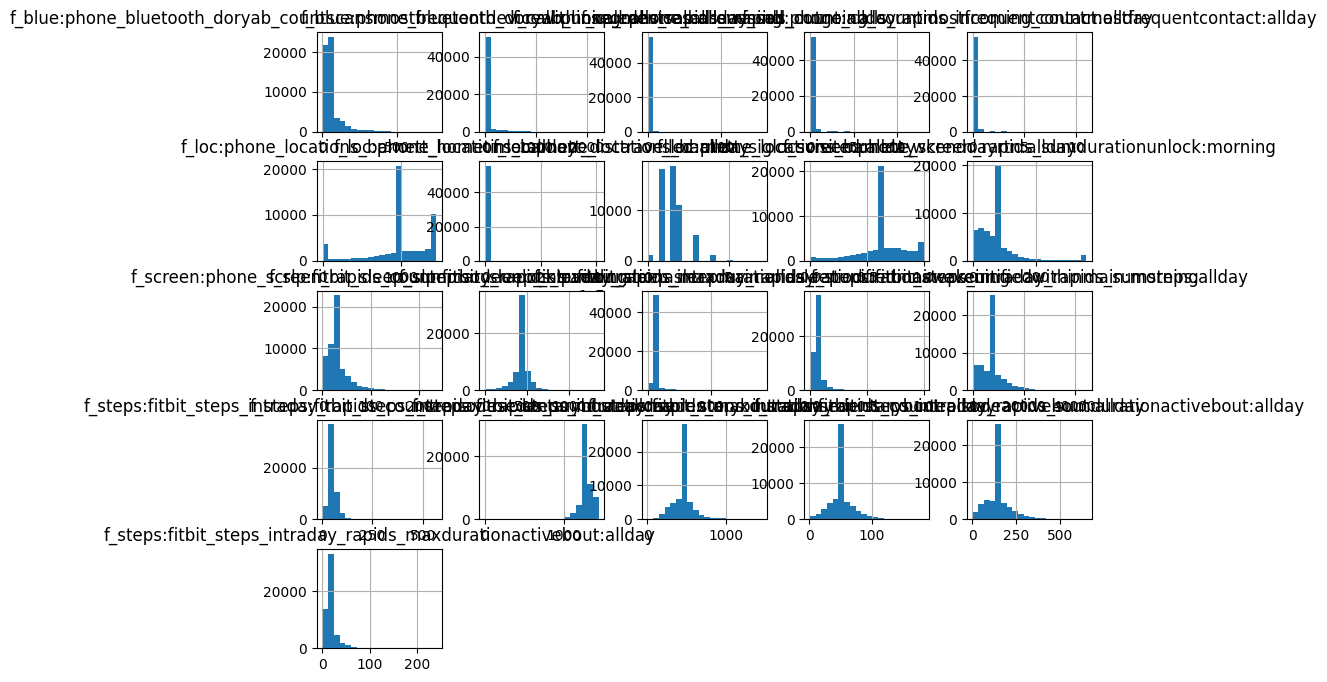

In [4]:
full_feature_data.hist(bins=20, figsize=(10, 8)) 

In [5]:
full_feature_data.to_csv('merged_filtered_feature_data.csv')